In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# 1. Читаем данные
df = pd.read_csv('data.csv')
print(df.head())


         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


In [9]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


In [11]:
if 'data' in df.columns:
    df['data'] = pd.to_datetime(df['data'], dayfirst=True)
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


In [13]:
grouped_df = df.groupby('Дата').agg({'Количество': 'sum'}).reset_index()
print(grouped_df.head())

         Дата  Количество
0  2018-01-04        3734
1  2018-01-05        3643
2  2018-01-06        3193
3  2018-01-07        3298
4  2018-01-09        4055


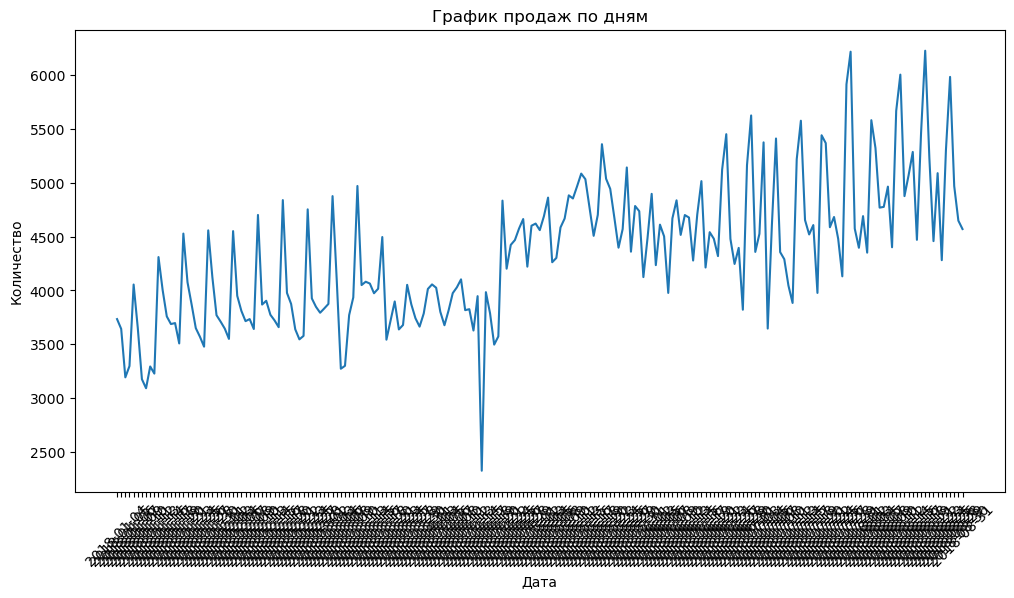

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Дата', y='Количество', data=grouped_df)
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.title('График продаж по дням')
plt.xticks(rotation=45)
plt.show()


In [16]:
# 6. Поиск строки с максимальным выбросом по количеству продаж
outlier = df[df['Количество'] == df['Количество'].max()]
print(outlier)

              Дата  Склад   Контрагент Номенклатура  Количество
218822  2018-06-28      1  address_208    product_0         200


In [24]:
df['Дата'] = pd.to_datetime(df['Дата'], dayfirst=True, errors='coerce')

In [25]:
# 7. Топовый товар по продажам по средам за июнь, июль, август у 3 склада
df['Месяц'] = df['Дата'].dt.month
df['День недели'] = df['Дата'].dt.dayofweek
top_product = df[(df['Месяц'].isin([6, 7, 8])) & (df['День недели'] == 2) & (df['Склад'] == 3)]
top_product = top_product.groupby('Номенклатура').agg({'Количество': 'sum'}).idxmax()
print(top_product)

Количество    product_1
dtype: object


In [29]:
import pandas as pd

df_weather = pd.read_excel("weather_data.xlsx")
print(df_weather.head()) 

   Местное время в Астане      T     Po    P  Pa  \
0                    -2.0  737.6  770.6 -0.2  81   
1                    -2.4  737.8  770.9  0.2  87   
2                    -1.8  737.6  770.6 -0.5  68   
3                    -2.3  738.1  771.2 -0.6  64   
4                    -4.5  738.7  772.0 -0.2  58   

                                 U  DD  Ff  ff10                        ff3  \
0              Ветер, дующий с юга   3 NaN   NaN                      100%.   
1              Ветер, дующий с юга   3 NaN   NaN                      100%.   
2              Ветер, дующий с юга   3 NaN   NaN  90  или более, но не 100%   
3  Ветер, дующий с юго-юго-востока   3 NaN   NaN                      100%.   
4              Ветер, дующий с юга   3 NaN   NaN                      100%.   

   ...                                                 Cm   Ch    VV   Td  \
0  ...                                                NaN  NaN  -4.8  0.4   
1  ...                                                NaN 